# Título do Projeto

In [1]:
# Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração de exibição
%matplotlib inline

### Leitura do arquivo original 

In [2]:
# Leitura do arquivo CSV
file_path = 'Crime_Data_LA.csv'
df = pd.read_csv(file_path)

In [3]:
# Informação sobre os tipos de dados e valores ausentes
display(df.info())
# Estatísticas descritivas
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986500 entries, 0 to 986499
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           986500 non-null  int64  
 1   Date Rptd       986500 non-null  object 
 2   DATE OCC        986500 non-null  object 
 3   TIME OCC        986500 non-null  int64  
 4   AREA            986500 non-null  int64  
 5   AREA NAME       986500 non-null  object 
 6   Rpt Dist No     986500 non-null  int64  
 7   Part 1-2        986500 non-null  int64  
 8   Crm Cd          986500 non-null  int64  
 9   Crm Cd Desc     986500 non-null  object 
 10  Mocodes         840065 non-null  object 
 11  Vict Age        986500 non-null  int64  
 12  Vict Sex        846925 non-null  object 
 13  Vict Descent    846914 non-null  object 
 14  Premis Cd       986486 non-null  float64
 15  Premis Desc     985915 non-null  object 
 16  Weapon Used Cd  326368 non-null  float64
 17  Weapon Des

None

,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
count,9.865000e+05,986500.000000,986500.000000,986500.000000,986500.000000,986500.000000,986500.000000,986486.000000,326368.000000,986489.000000,68912.000000,2310.000000,64.00000,986500.000000,986500.000000
mean,2.198270e+08,1339.086392,10.698086,1116.245129,1.403666,500.782398,29.045177,306.054803,363.846008,500.538333,958.162091,984.198701,991.21875,33.996033,-118.083281
std,1.299240e+07,651.457178,6.108873,611.002343,0.490632,206.092913,21.976666,219.156166,123.699000,205.891829,110.250287,51.495991,27.06985,1.633543,5.661853
min,8.170000e+02,1.000000,1.000000,101.000000,1.000000,110.000000,-4.000000,101.000000,101.000000,110.000000,210.000000,310.000000,821.00000,0.000000,-118.667600
25%,2.106103e+08,900.000000,5.000000,587.000000,1.000000,331.000000,0.000000,101.000000,311.000000,331.000000,998.000000,998.000000,998.00000,34.014600,-118.430500
50%,2.208174e+08,1420.000000,11.000000,1141.000000,1.000000,442.000000,30.000000,203.000000,400.000000,442.000000,998.000000,998.000000,998.00000,34.058900,-118.322500
75%,2.310049e+08,1900.000000,16.000000,1617.000000,2.000000,626.000000,44.000000,501.000000,400.000000,626.000000,998.000000,998.000000,998.00000,34.164900,-118.273900
max,2.499289e+08,2359.000000,21.000000,2199.000000,2.000000,956.000000,120.000000,976.000000,516.000000,956.000000,999.000000,999.000000,999.00000,34.334300,0.000000


### Tratamento de dados

In [ ]:
# Renomeando colunas
df.rename(columns = {
    'DR_NO': 'ID_OCORRENCIA',
    'Date Rptd': 'DT_RELATO',
    'DATE OCC': 'DT_OCORRENCIA',
    'TIME OCC': 'HR_OCORRENCIA',
    'AREA': 'ID_AREA',
    'AREA NAME': 'DS_AREA',
    'Rpt Dist No': 'ID_DISTRITO_RELATO',
    'Part 1-2': 'Parte_Crime',
    'Crm Cd': 'ID_CRIME',
    'Crm Cd Desc': 'DESC_CRIME',
    'Status': 'STATUS',
    'Status Desc': 'DESC_STATUS',
    'Crm Cd 1': 'FK_CRIME_1',
    'Crm Cd 2': 'FK_CRIME_2',
    'Crm Cd 3': 'FK_CRIME_3',
    'Crm Cd 4': 'FK_CRIME_4',
    'LOCATION': 'DS_LOCALIZACAO',
    'Cross Street': 'RUA_CRUZADA',
    'LAT': 'FK_LATITUDE',
    'LON': 'FK_LONGITUDE',
    'Mocodes': 'DS_MODUS_OPERANDI',
    'Vict Age': 'FK_IDADE_VITIMA',
    'Vict Sex': 'SEXO_VITIMA',
    'Vict Descent': 'DESCENDENCIA_VITIMA',
    'Premis Cd': 'Codigo_Predio',
    'Premis Desc': 'Descricao_Predio',
    'Weapon Used Cd': 'ID_ARMA_USADA',
    'Weapon Desc': 'DESC_ARMA_USADA'
}, inplace=True)

# Lidando com valores ausentes
df.dropna(subset=['ID_OCORRENCIA', 'DT_OCORRENCIA'], inplace=True)  # Excluir linhas com valores ausentes em colunas importantes
df.fillna({'DESC_ARMA_USADA': 'Não especificada'}, inplace=True)  # Preencher valores ausentes com um valor padrão

# Limpando valores que não fazem sentido
df['FK_IDADE_VITIMA'] = df['FK_IDADE_VITIMA'].apply(lambda x: np.nan if (x < 1 or x > 100) else x)

# Conversão de tipos de dados
df['DT_RELATO'] = pd.to_datetime(df['DT_RELATO'], errors='coerce')
df['DT_OCORRENCIA'] = pd.to_datetime(df['DT_OCORRENCIA'], errors='coerce')

# desc_crime_general com o resumo
desc_crime_resumo = []
for desc_crime in list(df["DESC_CRIME"]):
    if "VANDALISM" in desc_crime:
        desc_crime_resumo.append("VANDALISM")
    elif "THEFT" in desc_crime:
        desc_crime_resumo.append("THEFT")
    elif "STOLEN" in desc_crime:
        desc_crime_resumo.append("STOLEN")
    elif "ASSAULT" in desc_crime:
        desc_crime_resumo.append("ASSAULT")
    elif "SHOTS" in desc_crime:
        desc_crime_resumo.append("SHOTS")
    elif "BURGLARY" in desc_crime:
        desc_crime_resumo.append("BURGLARY")
    elif "ROBBERY" in desc_crime:
        desc_crime_resumo.append("ROBBERY")
    elif "HOMICIDE" in desc_crime:
        desc_crime_resumo.append("HOMICIDE")
    elif "SEX" in desc_crime or "RAPE" in desc_crime:
        desc_crime_resumo.append("SEXUAL CONTACT")
    else:
        desc_crime_resumo.append(desc_crime)
df["DESC_CRIME_RESUMO"] = desc_crime_resumo


## Análises Iniciais

### Análise Exploratória

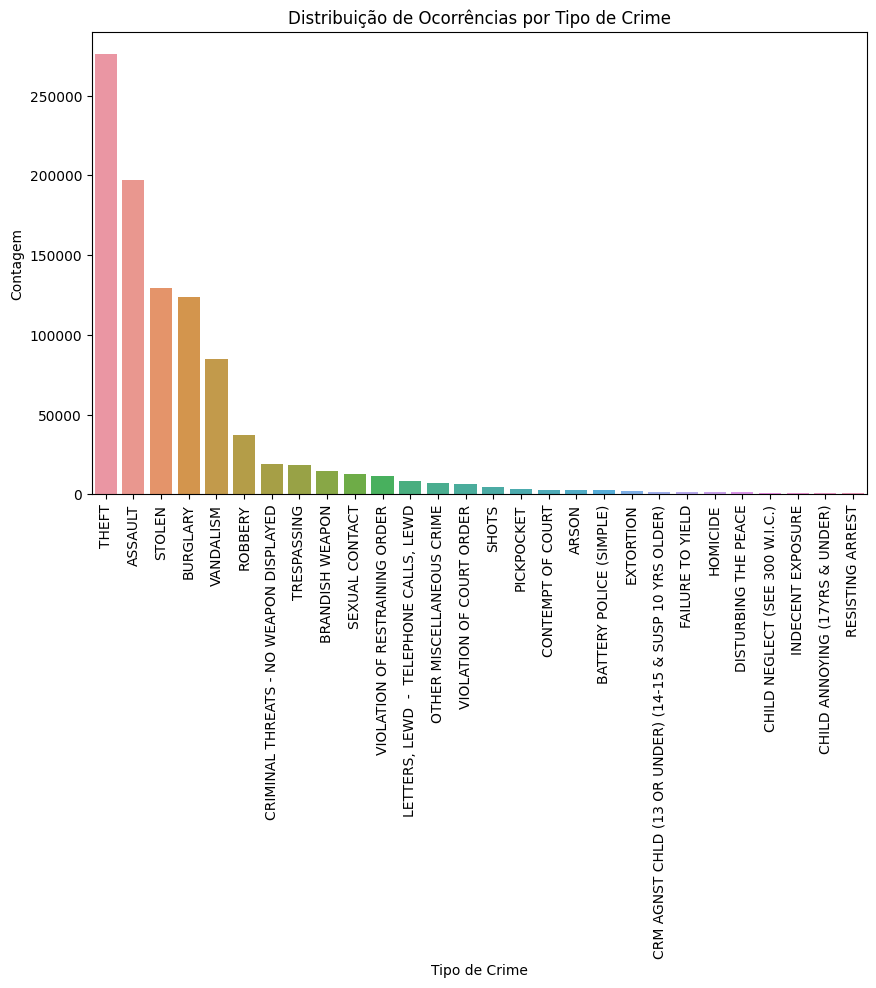

In [31]:
# Distribuição de uma variável categórica

# Filtrar os valores acima de 5 em contagem
crime_counts = df['DESC_CRIME_RESUMO'].value_counts()
filtered_crime_counts = crime_counts[crime_counts > 10**3]

# Ordenar da maior para a menor contagem
sorted_crime_counts = filtered_crime_counts.sort_values(ascending=False)

# Plotar
plt.figure(figsize=(10, 6))
sns.countplot(data=df[df['DESC_CRIME_RESUMO'].isin(sorted_crime_counts.index)], 
x='DESC_CRIME_RESUMO', 
order=sorted_crime_counts.index)
plt.title('Distribuição de Ocorrências por Tipo de Crime')
plt.xlabel('Tipo de Crime')
plt.ylabel('Contagem')
plt.xticks(rotation = 90)
plt.show()

c:\Users\vpacheco\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


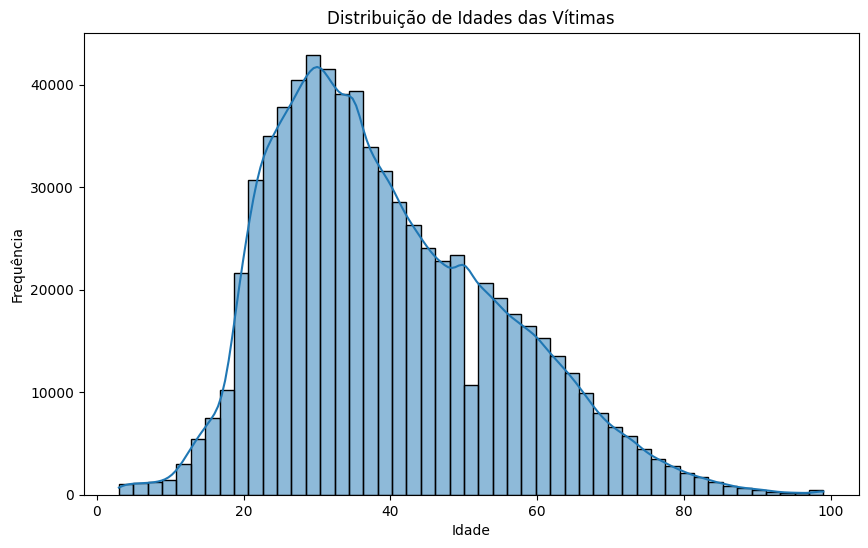

In [ ]:
# Distribuição de uma variável numérica
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='FK_IDADE_VITIMA', bins = int((100-2)/2), kde=True)
plt.title('Distribuição de Idades das Vítimas')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

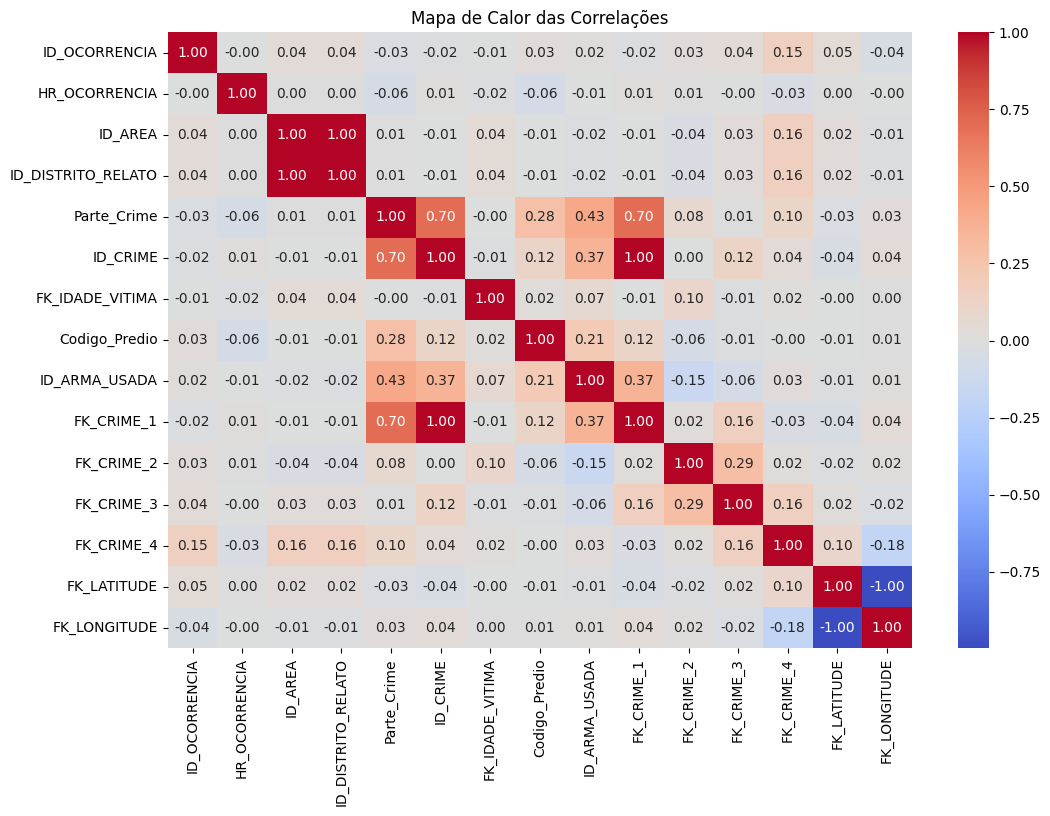

In [ ]:
# Análise de correlação
df_numeric = df.select_dtypes(include=[np.number])
corr_matrix = df_numeric.corr() # Cria a matriz de correlação
# Plota o mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Calor das Correlações')
plt.show()

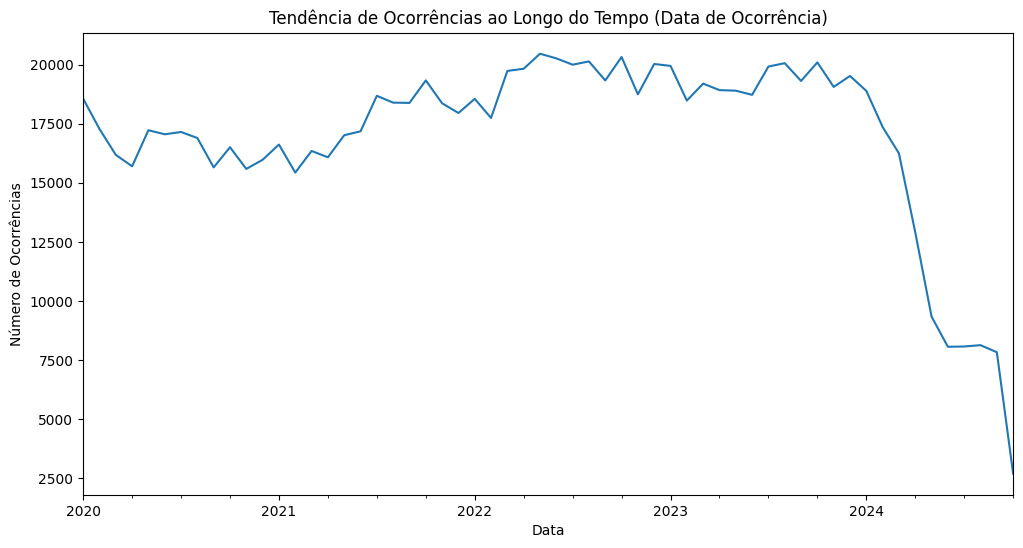

In [ ]:
# Análise de tendências ao longo do tempo
plt.figure(figsize=(12, 6))
df.groupby(df['DT_OCORRENCIA'].dt.to_period('M')).size().plot()
plt.title('Tendência de Ocorrências ao Longo do Tempo (Data de Ocorrência)')
plt.xlabel('Data')
plt.ylabel('Número de Ocorrências')
plt.show()

c:\Users\vpacheco\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


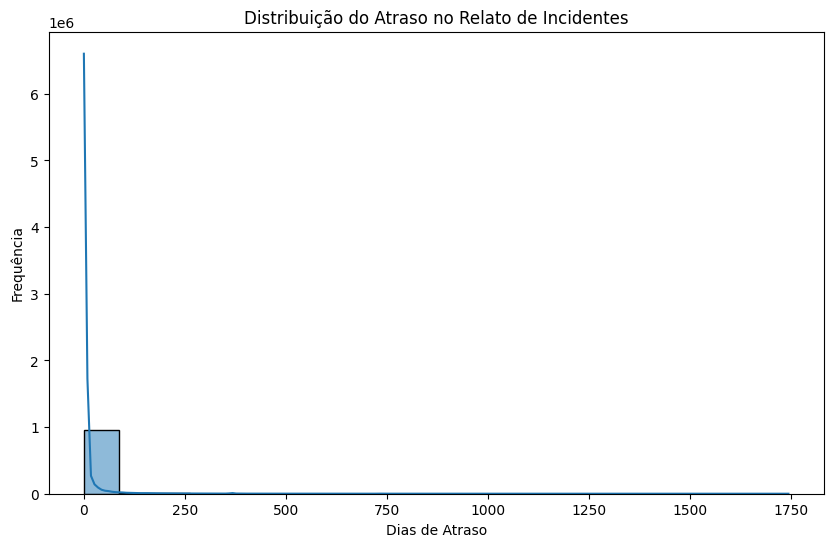

In [ ]:
# Analisando a diferença de tempo entre a data de ocorrência e a data de relato
df['Atraso_Relato'] = (df['DT_RELATO'] - df['DT_OCORRENCIA']).dt.days

# Exibindo a distribuição do atraso de relato
plt.figure(figsize=(10, 6))
sns.histplot(df['Atraso_Relato'].dropna(), bins=20, kde=True)
plt.title('Distribuição do Atraso no Relato de Incidentes')
plt.xlabel('Dias de Atraso')
plt.ylabel('Frequência')
plt.show()

In [ ]:
import folium
from folium.plugins import HeatMap

grouped = df.groupby('ID_AREA').agg({
'FK_LATITUDE': 'median',
'FK_LONGITUDE': 'median',
'ID_AREA': 'size'
}).rename(columns={'ID_AREA': 'OCORRENCIAS'}).reset_index()

# Crie um mapa centrado na média das coordenadas de latitude e longitude
latitude_median = df['FK_LATITUDE'].median()
longitude_median = df['FK_LONGITUDE'].median()
mapa = folium.Map(location=[latitude_median, longitude_median], zoom_start=10)
# Adicione círculos ao mapa para cada área agrupada
for _, row in grouped.iterrows():
    folium.Circle(
    location=[row['FK_LATITUDE'], row['FK_LONGITUDE']],
    radius=row['OCORRENCIAS'] * 0.075,  # Ajuste o fator de multiplicação conforme necessário
    color='blue',
    fill=True,
    fill_color='blue',
    popup=f"AREA: {int(row['ID_AREA'])}, Ocorrências: {int(row['OCORRENCIAS'])}"
    ).add_to(mapa)

# Adicione uma camada de calor (Heatmap)
heat_data = [[row['FK_LATITUDE'], row['FK_LONGITUDE'], row['OCORRENCIAS']] for index, row in grouped.iterrows()]
HeatMap(heat_data).add_to(mapa)
# Adicione diferentes camadas de mapas
# folium.TileLayer('Stamen Terrain').add_to(mapa)
# folium.TileLayer('Stamen Toner').add_to(mapa)
# folium.TileLayer('Stamen Watercolor').add_to(mapa)
# folium.TileLayer('cartodbpositron').add_to(mapa)
# folium.TileLayer('cartodbdark_matter').add_to(mapa)
# # Adicione um controle de camadas
# folium.LayerControl().add_to(mapa)

# Exibir o mapa
mapa.save('mapa_ocorrencias_agrupadas.html')

### Análise Avançada com Machine Learning

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Seleção de características e variável alvo
features = df[['ID_AREA', 'FK_IDADE_VITIMA', 'ID_CRIME']]  # Substitua pelas suas colunas relevantes
target = df['STATUS']

# Remoção de amostras com valores ausentes
df_clean = df.dropna(subset=['ID_AREA', 'FK_IDADE_VITIMA', 'ID_CRIME', 'STATUS'])

# Atualizar features e target após remoção
features = df_clean[['ID_AREA', 'FK_IDADE_VITIMA', 'ID_CRIME']]
target = df_clean['STATUS']

# Divisão dos dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Treinamento do modelo
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Previsões
y_pred = model.predict(X_test)

# Avaliação do modelo
print('Relatório de Classificação:')
print(classification_report(y_test, y_pred))
print('Matriz de Confusão:')
print(confusion_matrix(y_test, y_pred))

Relatório de Classificação:


c:\Users\vpacheco\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\vpacheco\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\vpacheco\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

              precision    recall  f1-score   support

          AA       0.32      0.10      0.15     19661
          AO       0.45      0.31      0.37     29702
          CC       0.00      0.00      0.00         3
          IC       0.83      0.94      0.88    166808
          JA       0.09      0.02      0.03       728
          JO       0.15      0.03      0.05       454

    accuracy                           0.78    217356
   macro avg       0.30      0.23      0.25    217356
weighted avg       0.73      0.78      0.74    217356

Matriz de Confusão:
[[  1900   4499      0  13229     22     11]
 [  1764   9350      0  18548     20     20]
 [     0      0      0      3      0      0]
 [  2237   6992      0 157463     66     50]
 [    48     51      0    611     11      7]
 [    18     66      0    347      8     15]]
